## Importation des librairies

In [1]:
# Importation des librairias
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

## Importation des données

In [2]:
# Importation de la base de données
data = pd.read_excel(r"../datasets/newDataClinic.xlsx", engine='openpyxl')

# Affichage les données
print("Jeu de données importé ✅✅")

Jeu de données importé ✅✅


## Encodage des colonnes catégorielles

In [3]:
cat_col = data.select_dtypes(include=['object']).columns.difference(['Frissons']).tolist()
encoder = LabelEncoder()
for col in cat_col:
    data[col] = encoder.fit_transform(data[col])

oneencoder = OneHotEncoder(drop='if_binary', sparse_output=False)
oneencoder_df = pd.DataFrame(
    oneencoder.fit_transform(data[['Frissons']]),
    columns= oneencoder.get_feature_names_out(['Frissons']),
)
data = pd.concat([data, oneencoder_df], axis=1)

print("Encodage réussi ✅✅")

Encodage réussi ✅✅


## Re-définir le jeu de données pour l'EDA

In [4]:
# Définir des colonnes à exclure
colonnes_a_exclure = ['Traitement','Frissons', 'Frissons_Present']

# Re-définition du jeu de données pour l'EDA
data =data.drop(columns=colonnes_a_exclure)
print("Jeu de données redefini pour l'EDA")

Jeu de données redefini pour l'EDA


## Affichage des valeurs manquantes

<Axes: >

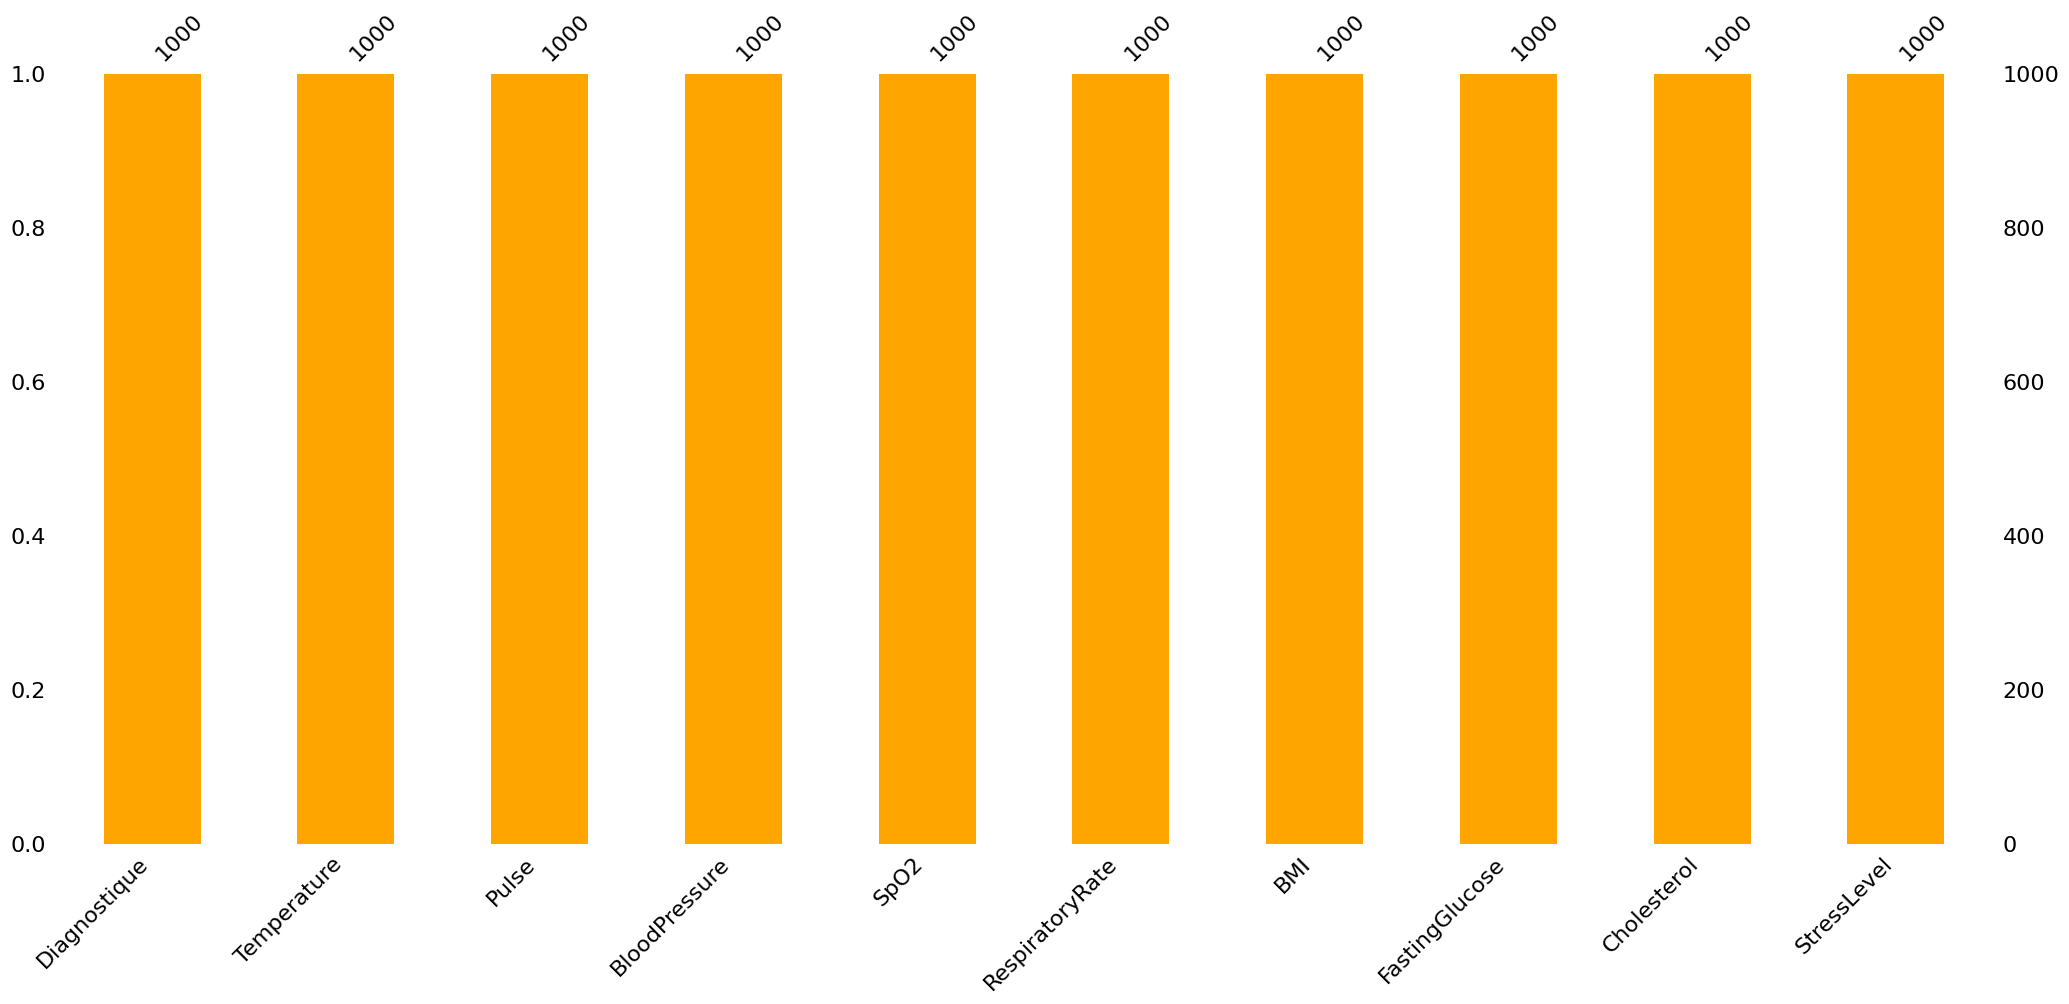

In [5]:
# Vérification des données manquantes
msno.bar(data, color="orange")

## Affichage des doublons

In [14]:
# Vérification les doublons
doublons = data.duplicated().sum()
if doublons == 0:
    print('Pas de doublons ✅✅')
else : 
    print(f'Doublons détectée :{doublons} lignes en double')

Pas de doublons ✅✅


## Gestion des valeurs abérrantes

In [7]:
# Gestion des valeurs extrêmes
data = data.apply(lambda x: x.clip(*x.quantile([0.05, 0.95])))
print("Valeurs abérrantes gérées ✅✅")

Valeurs abérrantes gérées ✅✅


## Statistique descriptive

In [ ]:
# Statistique descriptive
statistic_descript = data.describe()
statistic_descript

Diagnostique  Temperature        Pulse  BloodPressure         SpO2  \
count    1000.00000  1000.000000  1000.000000    1000.000000  1000.000000   
mean        2.07000    37.060765    69.677790     119.639510    94.903015   
std         1.44471     0.897368     9.082212      14.005163     2.845168   
min         0.00000    35.429500    53.326000      95.159500    90.519500   
25%         1.00000    36.427500    62.915000     109.167500    92.410000   
50%         2.00000    37.050000    69.650000     119.290000    94.690000   
75%         3.00000    37.750000    76.250000     130.310000    97.480000   
max         4.00000    38.641000    86.072000     145.051500    99.481000   

       RespiratoryRate          BMI  FastingGlucose  Cholesterol  StressLevel  
count      1000.000000  1000.000000     1000.000000  1000.000000  1000.000000  
mean         16.024565    26.428375      105.261550   199.351050     5.489380  
std           2.420283     4.879487       19.903829    28.348861     2.559062  
min          12.340000    18.949500       73.996500   153.973000     1.579500  
25%          13.830000    22.140000       88.075000   174.477500     3.240000  
50%          15.975000    26.475000      105.055000   200.195000     5.395000  
75%          18.202500    30.755000      122.535000   223.900000     7.810000  
max          19.760500    34.143000      136.592500   245.063000     9.540500

## Visualisation des données

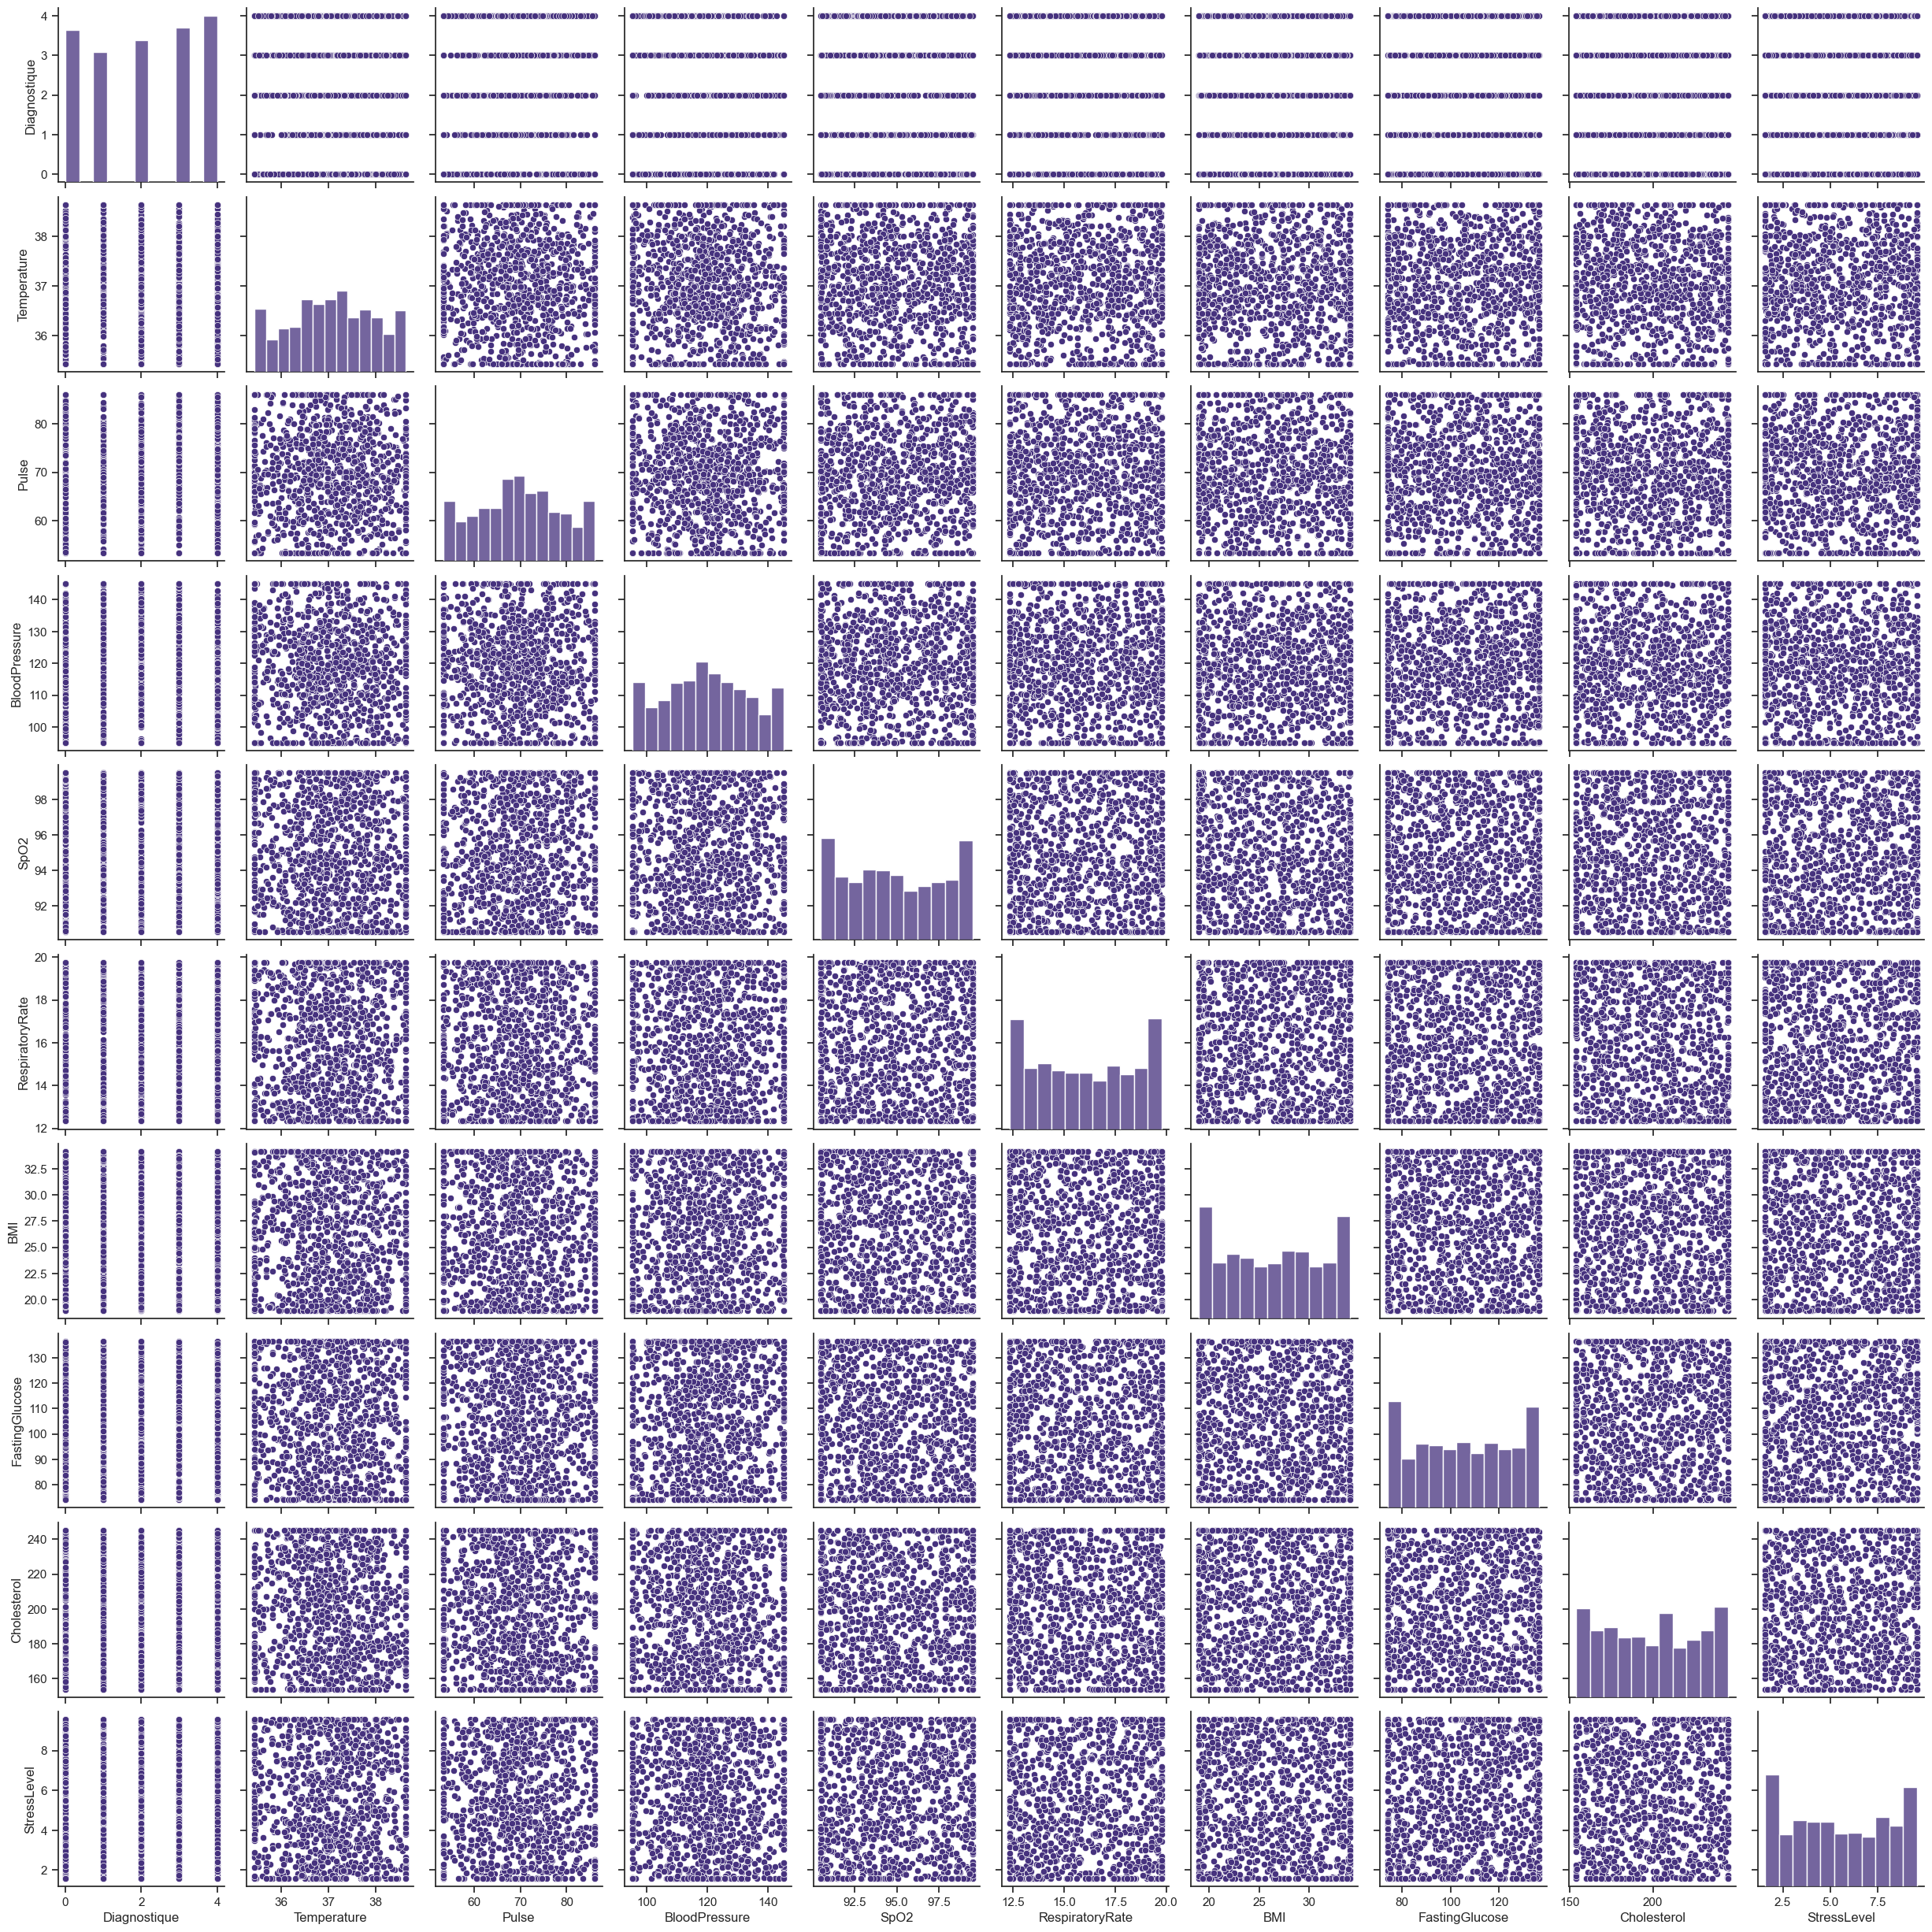

In [9]:
# Visualisation des données
sns.set(style='ticks', palette='viridis')
sns.pairplot(data)
plt.show()

## Relation entre variables

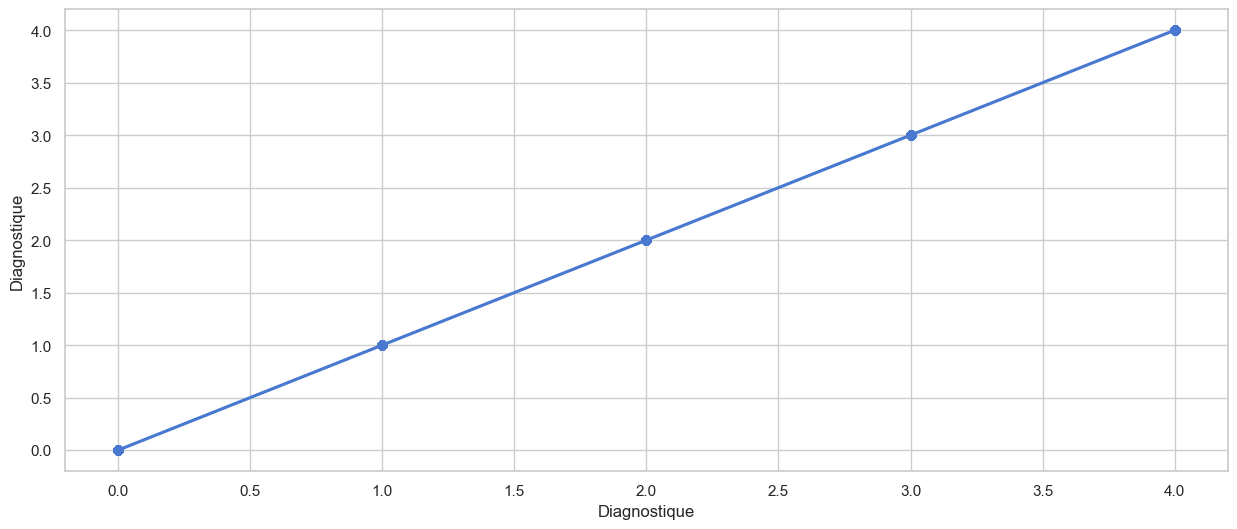

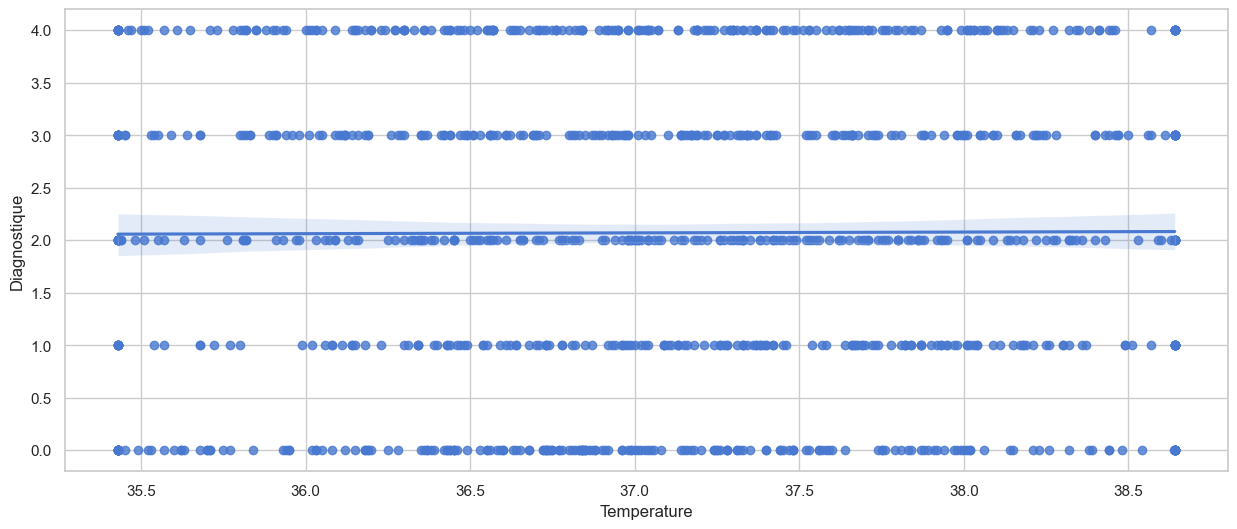

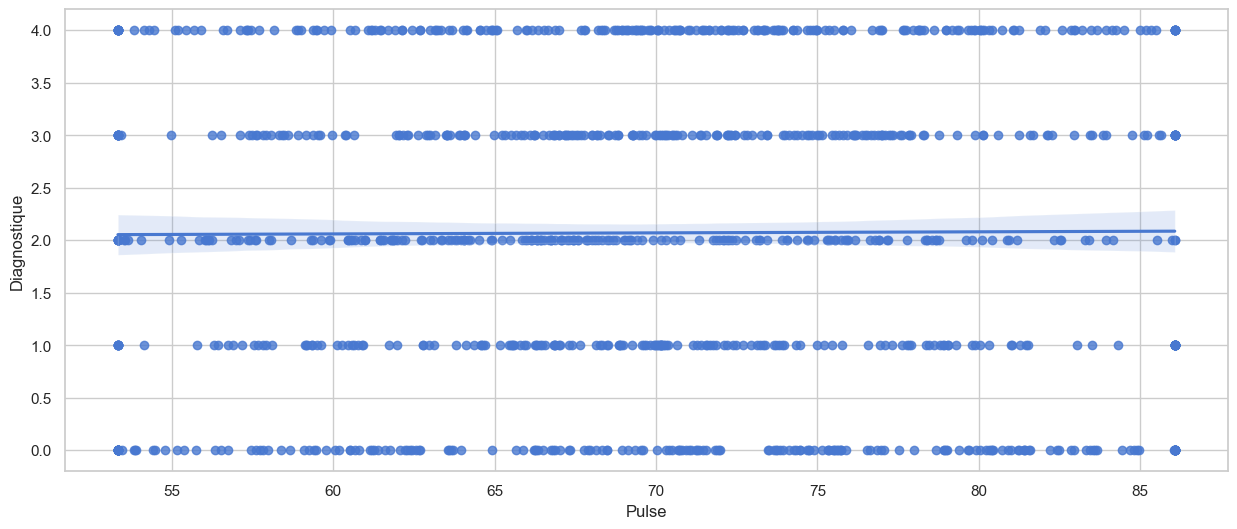

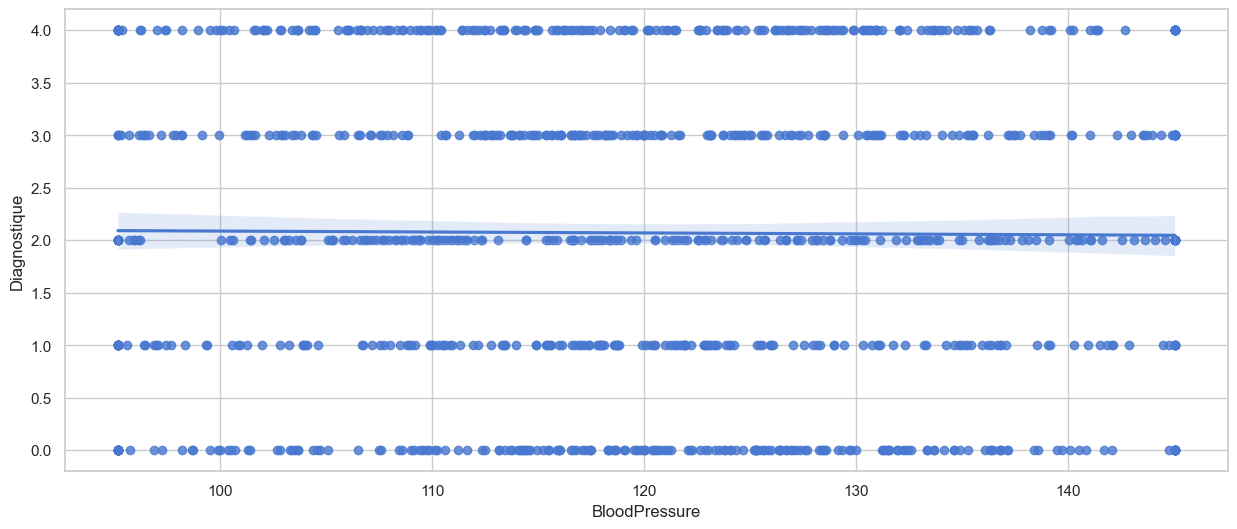

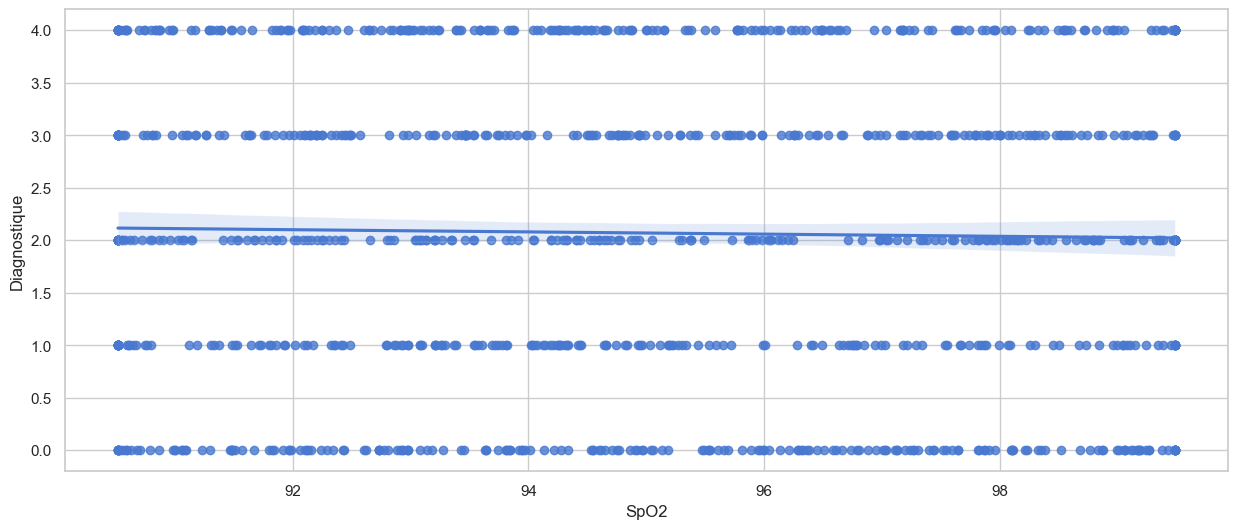

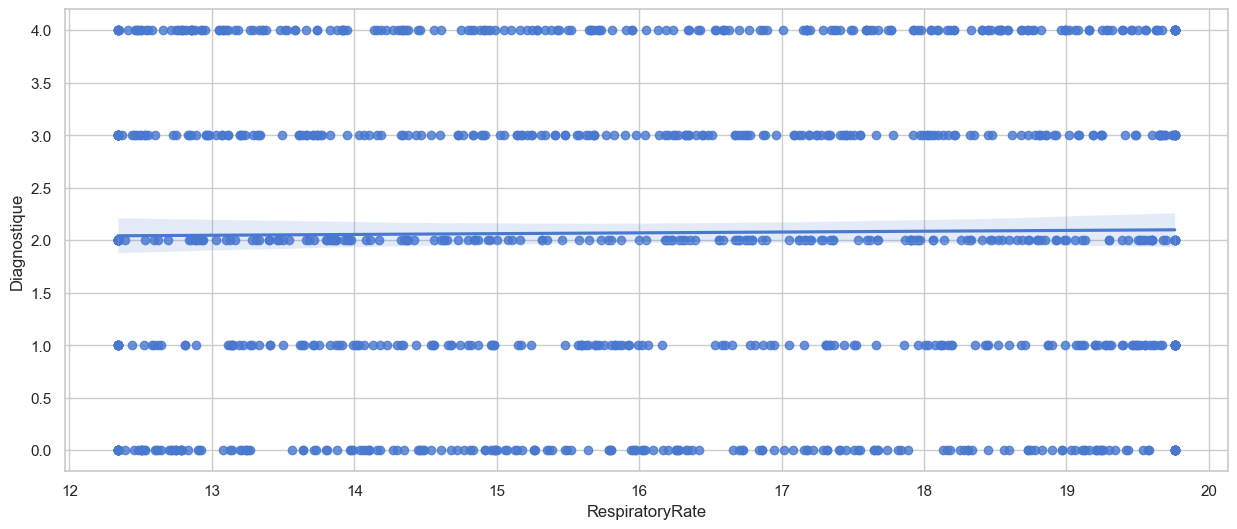

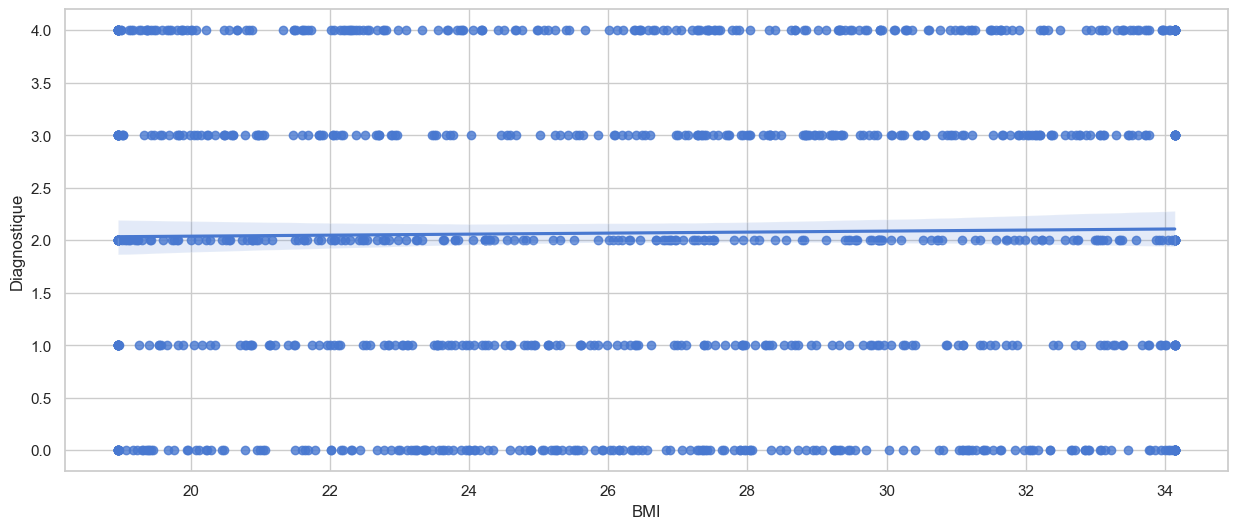

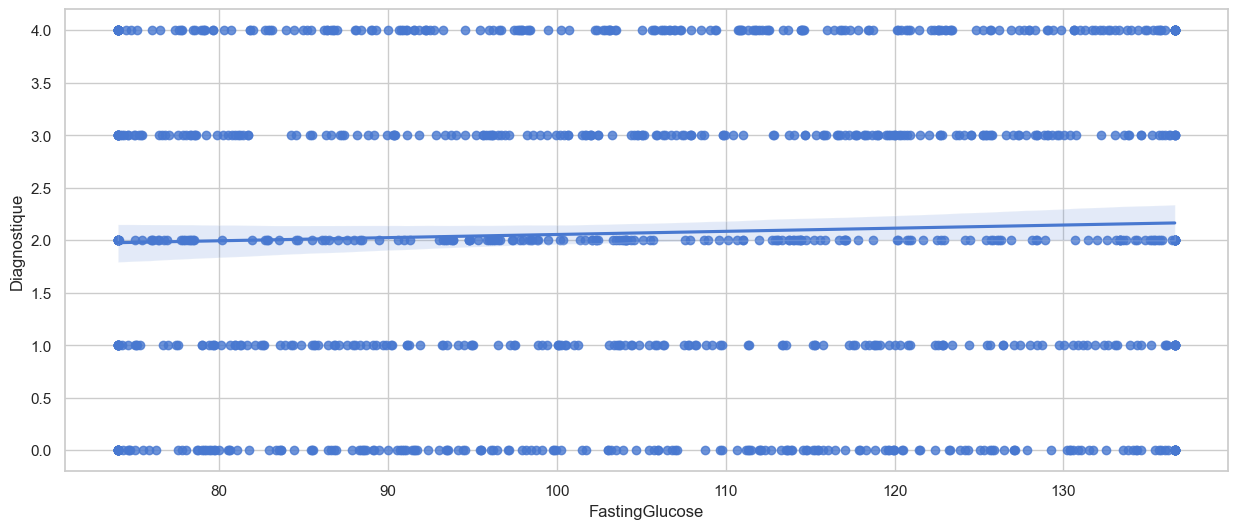

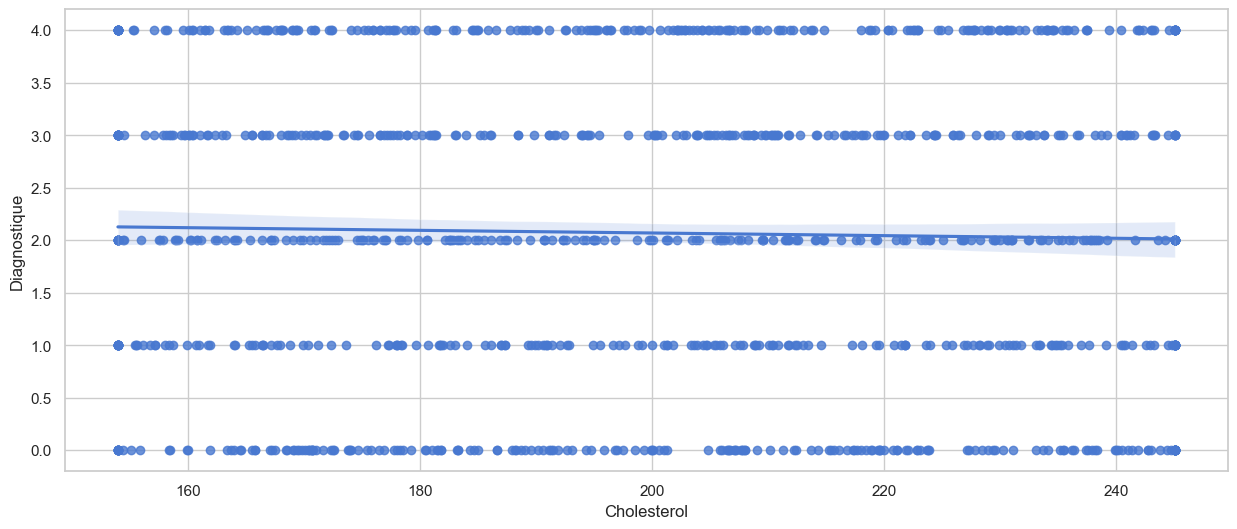

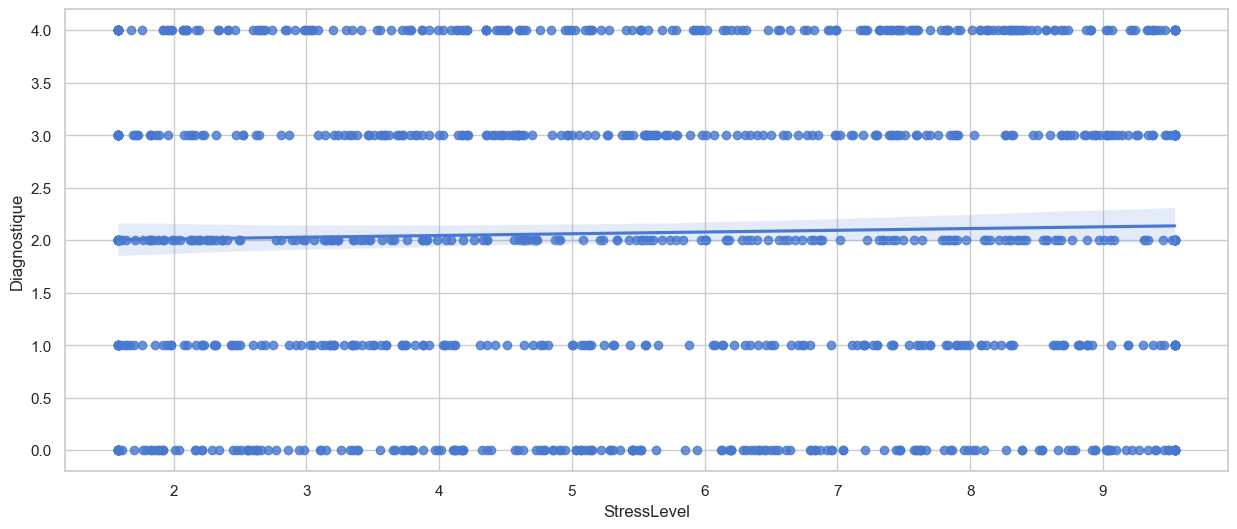

In [10]:
# Extraction des colonnes de prédicteurs
predictors = data

# Affichage des regplots
for col in predictors.columns :
    sns.set(style='whitegrid', palette='muted')
    plt.figure(figsize=(15,6))
    sns.regplot(x=predictors[col], y=data['Diagnostique'])
    plt.show()

## Carte de chaleurs entre la variable cible et les prédicteurs

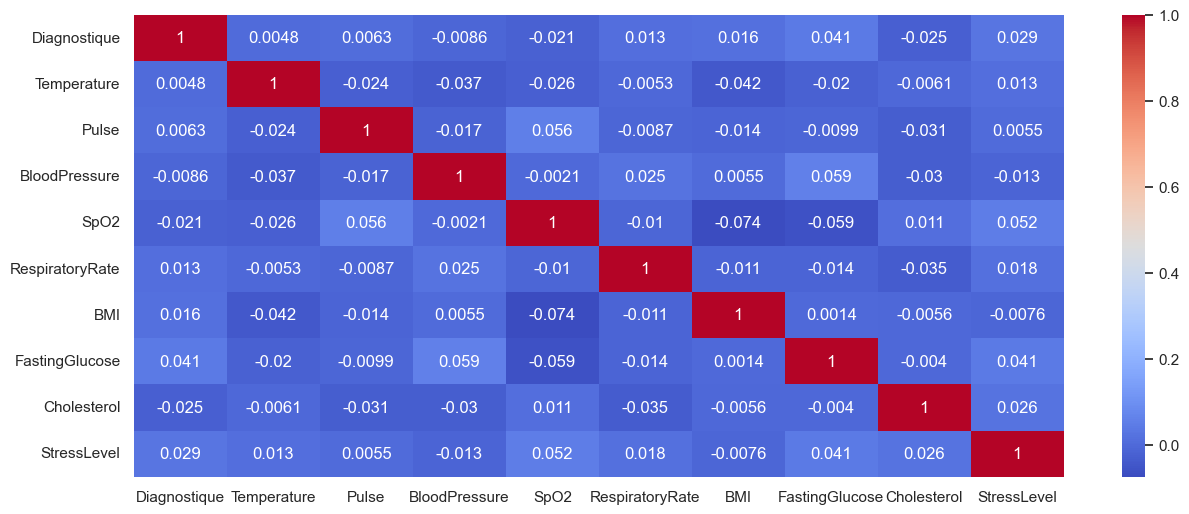

In [11]:
# Matrice de corrélation
corr_data = data.corr()

# Graphique de carte de chaleur
plt.figure(figsize=(15,6))
sns.heatmap(corr_data, cmap='coolwarm', annot=True)
plt.show()
